##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect pose landmarks from images.

## Preparation

Let's start with installing MediaPipe.


In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 16.2 MB/s eta 0:00:00


Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) for more information about this model bundle.

In [2]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Visualization utilities

In [3]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Download test image

To demonstrate the Pose Landmarker API, you can download a sample image using the follow code. The image is from [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [10]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

Saving z6230729899299_b450bebcba89f1d91bb628bc02e17636.jpg to z6230729899299_b450bebcba89f1d91bb628bc02e17636 (2).jpg
Uploaded file: z6230729899299_b450bebcba89f1d91bb628bc02e17636 (2).jpg


## Running inference and visualizing the results

The final step is to run pose landmark detection on your selected image. This involves creating your PoseLandmarker object, loading your image, running detection, and finally, the optional step of displaying the image with visualizations.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) to learn more about configuration options that this solution supports.


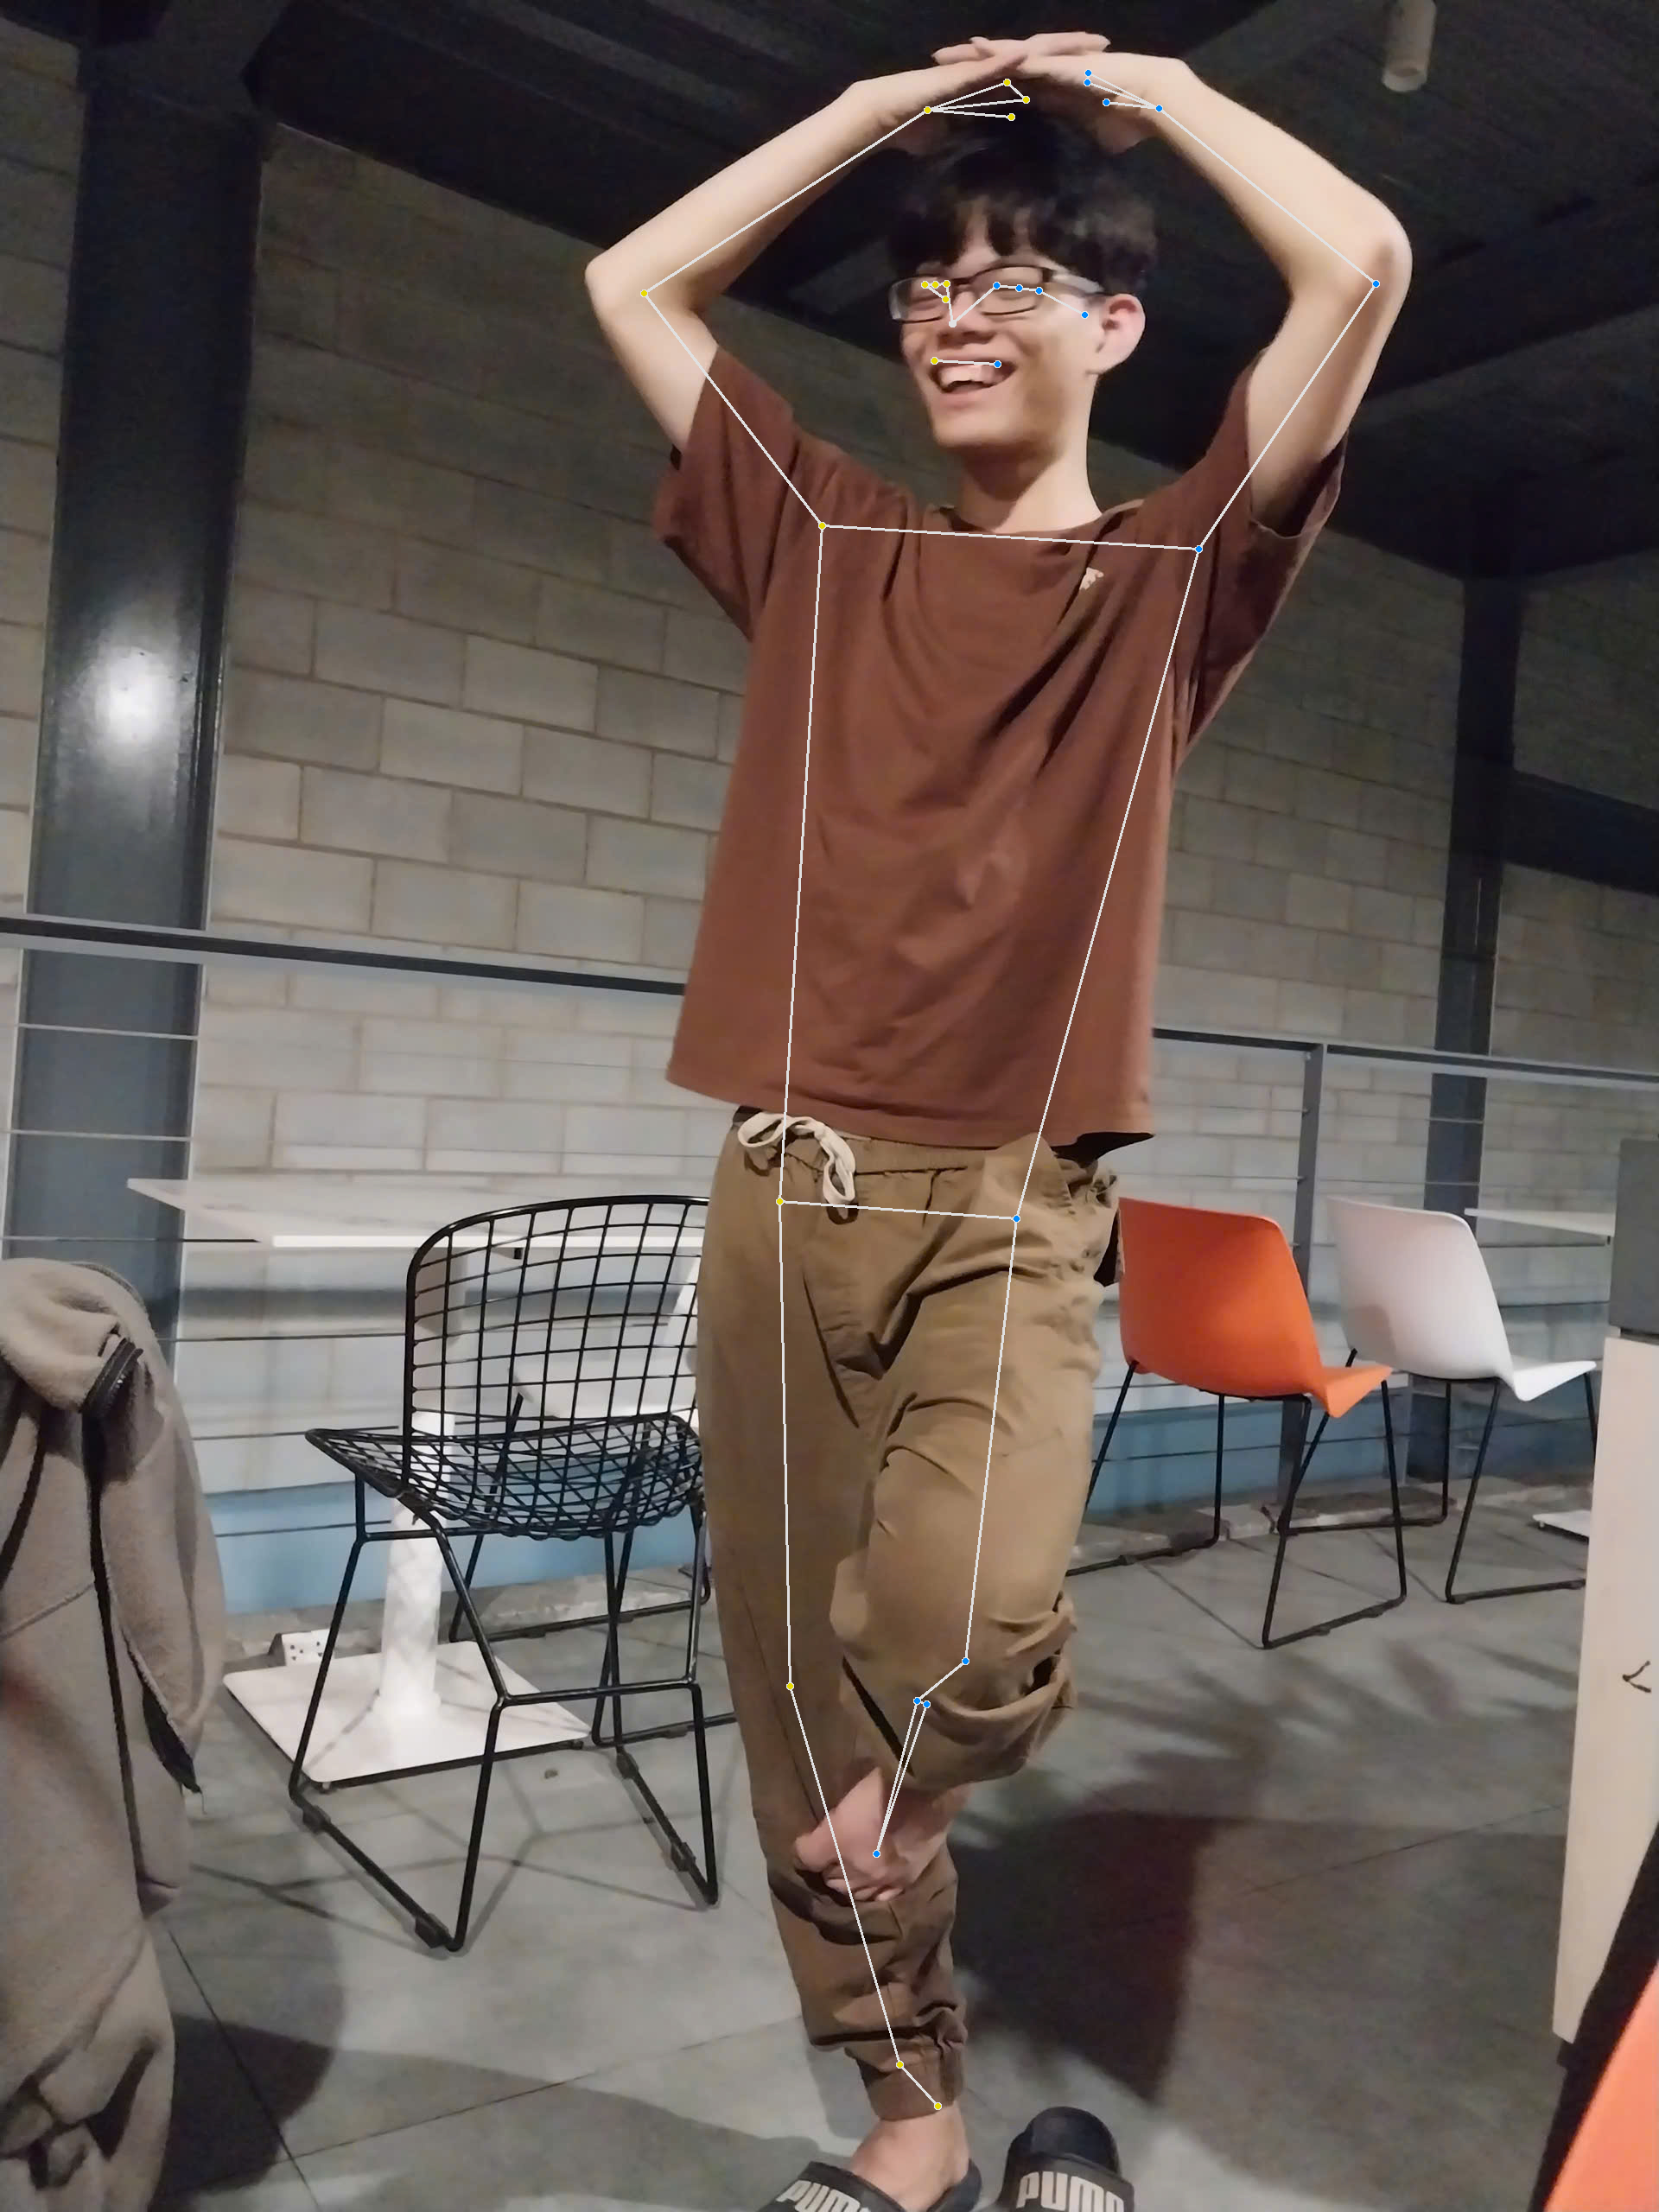

In [14]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("/content/z6228762990980_f15c2734a24a760c8f016743ca2058ba.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualize the pose segmentation mask.

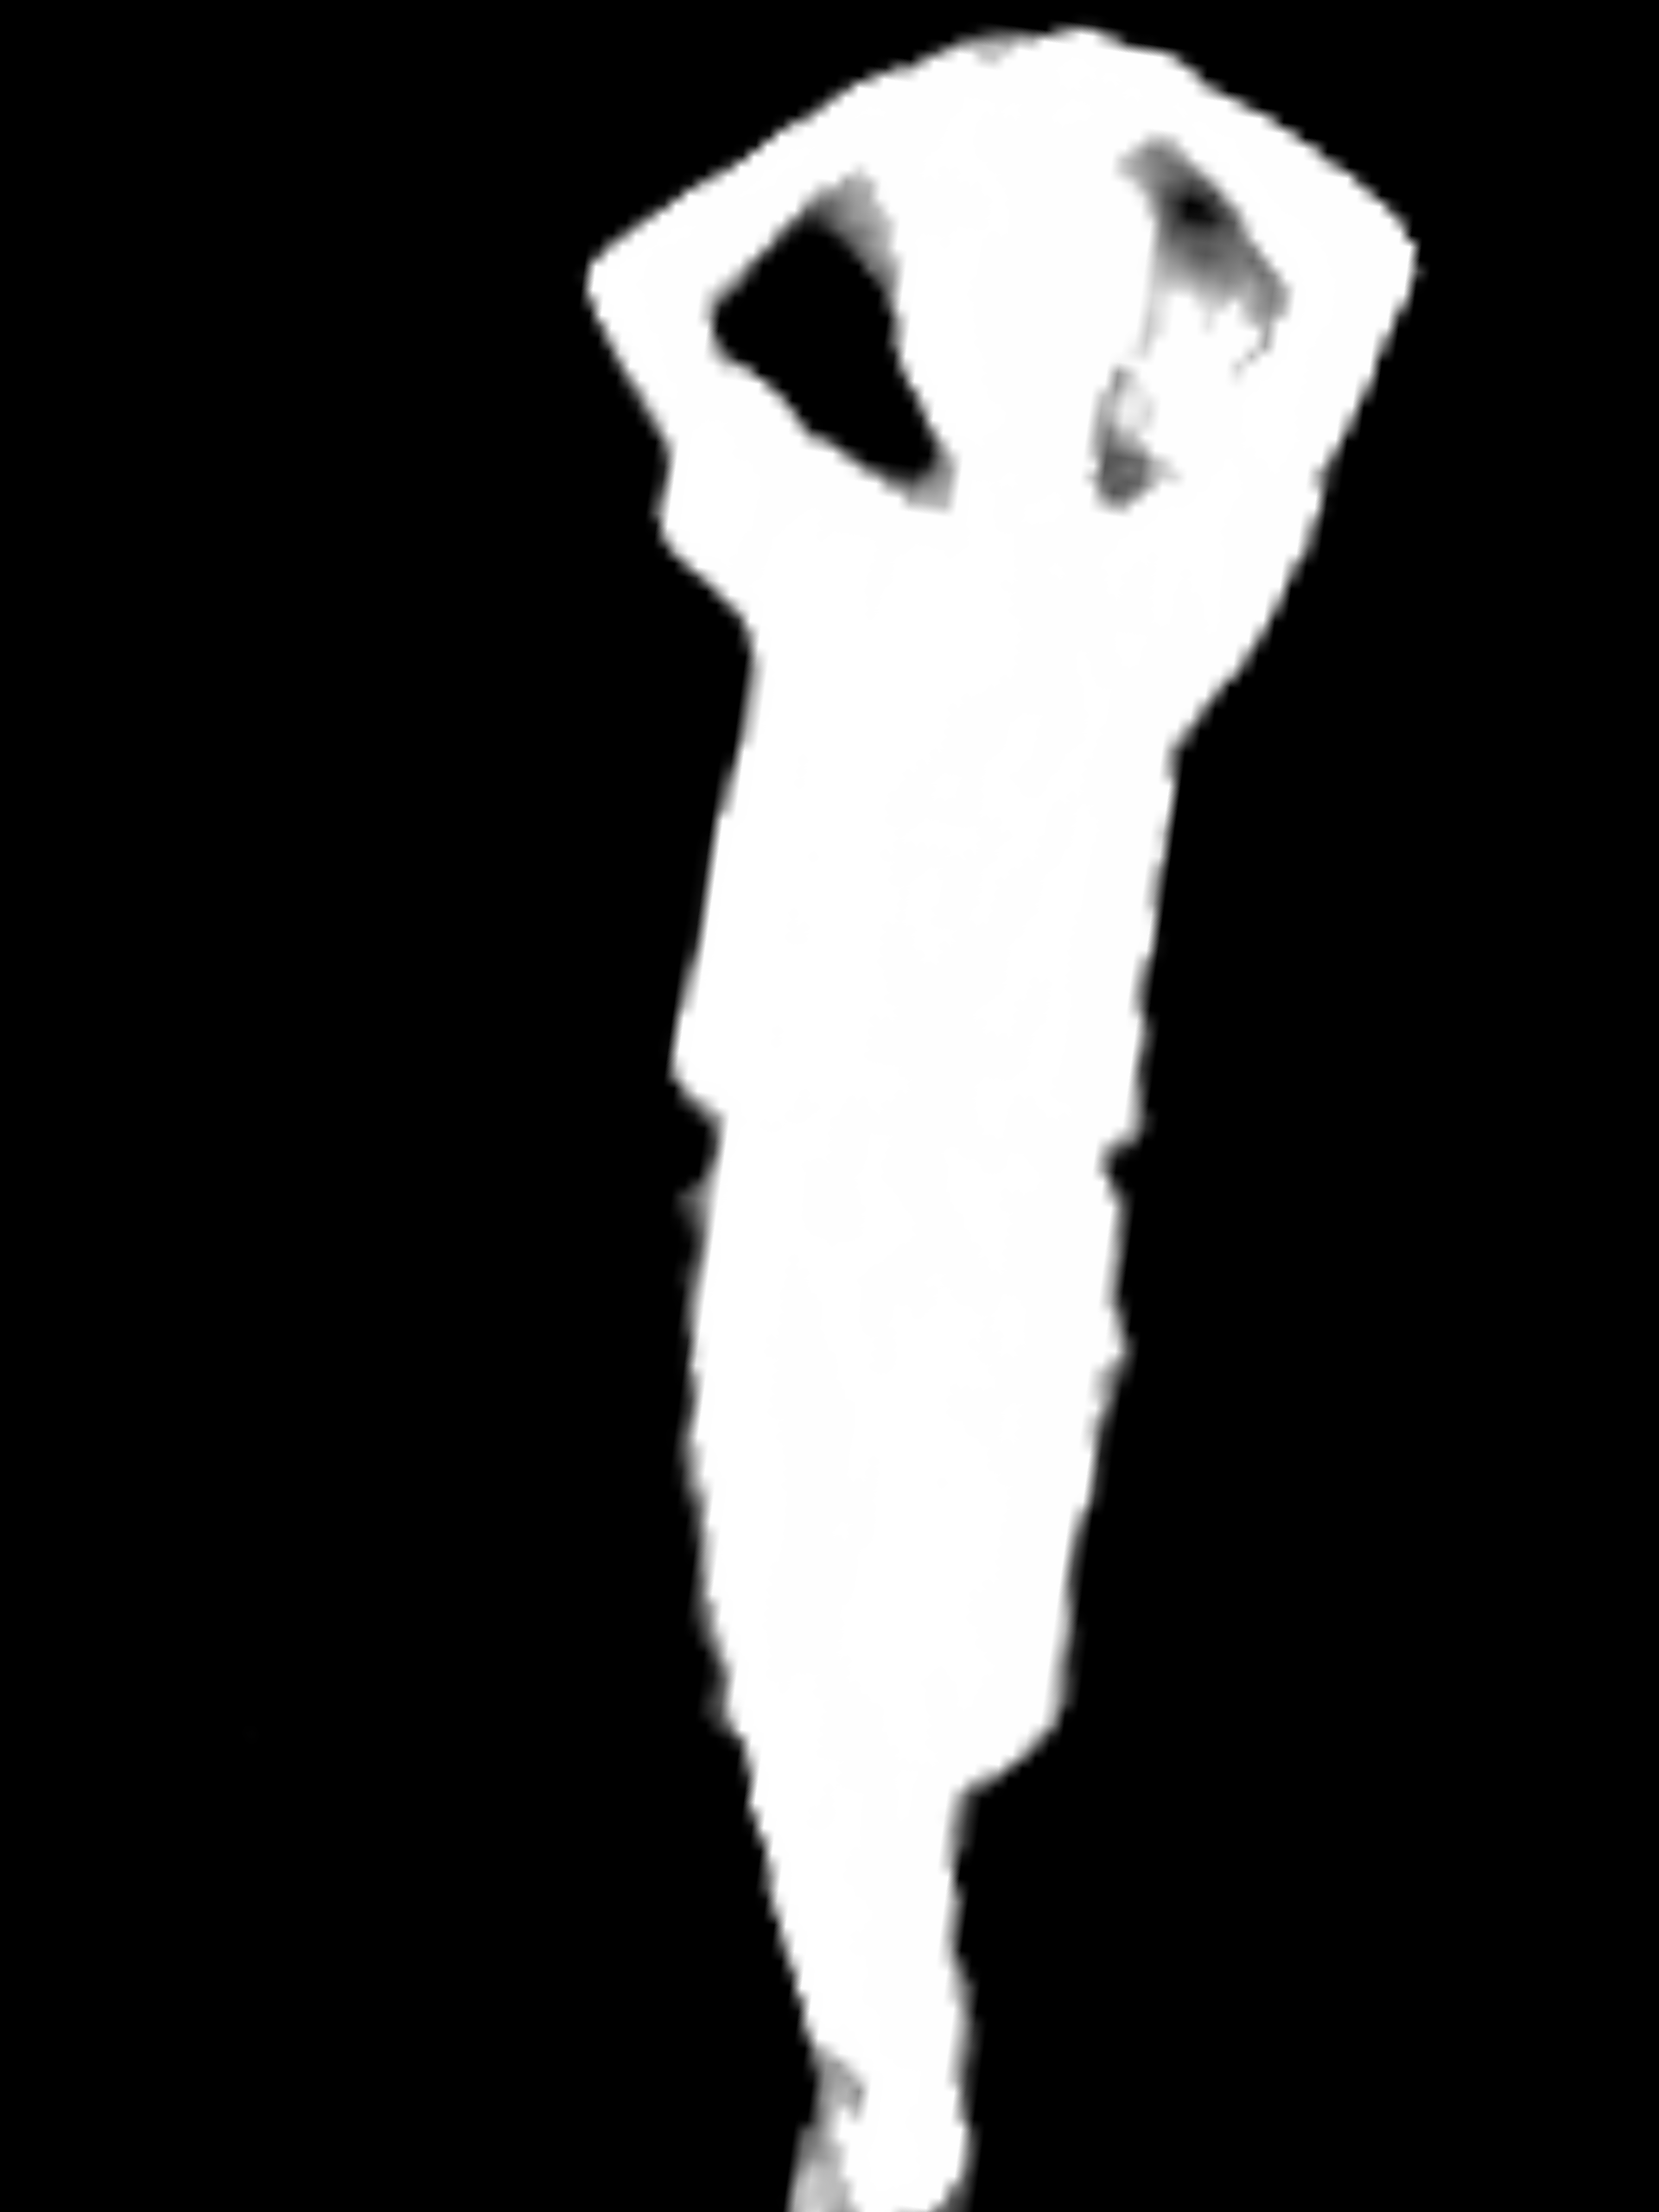

In [15]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)

In [16]:
pip install opencv-python mediapipe numpy


In [19]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  48782      0 --:--:-- --:--:-- --:--:-- 49282


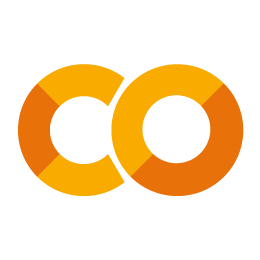

In [20]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [25]:
import cv2
import mediapipe as mp
import numpy as np

# Khởi tạo MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Đọc ảnh hoặc video
image = cv2.imread("/content/z6228762990980_f15c2734a24a760c8f016743ca2058ba.jpg")  # Thay bằng đường dẫn ảnh
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

if results.pose_landmarks:
    height, width, _ = image.shape

    # Lấy tọa độ của một số keypoints quan trọng
    landmarks = results.pose_landmarks.landmark

    def get_point(index):
        """Hàm lấy tọa độ của keypoint theo index"""
        return np.array([landmarks[index].x * width, landmarks[index].y * height])

    # Các điểm quan trọng
    nose = get_point(mp_pose.PoseLandmark.NOSE)
    shoulder_left = get_point(mp_pose.PoseLandmark.LEFT_SHOULDER)
    shoulder_right = get_point(mp_pose.PoseLandmark.RIGHT_SHOULDER)
    hip_left = get_point(mp_pose.PoseLandmark.LEFT_HIP)
    hip_right = get_point(mp_pose.PoseLandmark.RIGHT_HIP)
    knee_left = get_point(mp_pose.PoseLandmark.LEFT_KNEE)
    knee_right = get_point(mp_pose.PoseLandmark.RIGHT_KNEE)
    ankle_left = get_point(mp_pose.PoseLandmark.LEFT_ANKLE)
    ankle_right = get_point(mp_pose.PoseLandmark.RIGHT_ANKLE)

    # Đo chiều cao từ đỉnh đầu đến mắt cá chân
    body_height = np.linalg.norm(nose - shoulder_left) + \
                  np.linalg.norm(shoulder_left - hip_left) + \
                  np.linalg.norm(hip_left - knee_left) + \
                  np.linalg.norm(knee_left - ankle_left)

    # Đo vòng ngực (khoảng cách giữa 2 vai)
    chest_circumference = np.linalg.norm(shoulder_left - shoulder_right)

    # Đo vòng eo (khoảng cách giữa 2 hông)
    waist_circumference = np.linalg.norm(hip_left - hip_right)

    # Đo vòng mông (tính tương tự vòng eo nhưng thấp hơn)
    hip_circumference = np.linalg.norm(hip_left - hip_right) * 1.1  # Hệ số hiệu chỉnh

    # In kết quả
    print(f"Chiều cao cơ thể (cm): {body_height * 0.0943}")
    print(f"Vòng ngực (cm): {chest_circumference *0.0943}")
    print(f"Vòng eo (cm): {waist_circumference *0.0943}")
    print(f"Vòng mông (cm): {hip_circumference*0.0943}")




Chiều cao cơ thể (cm): 170.05488618600597
Vòng ngực (cm): 40.94291910441319
Vòng eo (cm): 23.95321040768907
Vòng mông (cm): 26.348531448457983


In [22]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  53121      0 --:--:-- --:--:-- --:--:-- 53341


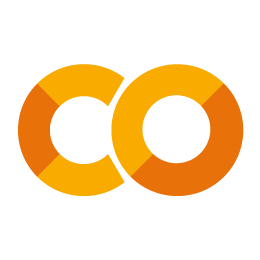

In [23]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

For example, here we download and display a PNG image of the Colab logo: